# Exercise 1.3: Distinguishing Complex from Complicated Systems

In this notebook, we'll explore the important distinction between complex and complicated systems through practical examples and exercises. Understanding this distinction is foundational to complex systems science.

## Key Differences: Complex vs. Complicated Systems

| Characteristic | Complicated Systems | Complex Systems |
|----------------|---------------------|------------------|
| Predictability | Generally predictable | Often unpredictable |
| Components | Many parts with fixed interactions | Components that adapt and evolve |
| Emergence | Properties follow directly from components | Novel emergent properties |
| Reducibility | Can be understood by studying individual components | Cannot be reduced to sum of components |
| Examples | Mechanical watch, airplane | Ecosystem, economy, immune system |

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Example 1: Complicated System - Linear Pendulum

Let's start with a complicated but not complex system: a simple pendulum. Its behavior is entirely predictable using Newton's laws.

In [2]:
def simulate_pendulum(length=1.0, g=9.8, theta0=np.pi/4, omega0=0, time_span=10, dt=0.05):
    """Simulate a simple pendulum using small-angle approximation."""
    
    # Time points
    t = np.arange(0, time_span, dt)
    
    # Calculate period and angular frequency
    T = 2 * np.pi * np.sqrt(length/g)  # Period
    omega_n = np.sqrt(g/length)        # Natural frequency
    
    # Calculate position at each time point
    theta = theta0 * np.cos(omega_n * t)
    
    # Convert to Cartesian coordinates for plotting
    x = length * np.sin(theta)
    y = -length * np.cos(theta)
    
    return t, theta, x, y, T

In [3]:
# Run the simulation
t, theta, x, y, period = simulate_pendulum(length=1.0, theta0=np.pi/6)

# Create an animation
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 0.5)
ax.set_aspect('equal')
ax.grid(True)

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    line.set_data([0, x[i]], [0, y[i]])
    time_text.set_text(time_template % t[i])
    return line, time_text

ani = FuncAnimation(fig, animate, frames=range(0, len(t), 2),
                    interval=50, blit=True, init_func=init)

plt.title(f'Simple Pendulum (Period: {period:.2f}s)')
plt.close()  # This prevents the static image from displaying twice
HTML(ani.to_jshtml())

The pendulum is a complicated system that follows deterministic, predictable rules. We can accurately model its behavior using differential equations, and its future states are completely determined by initial conditions.

## Example 2: Complex System - Cellular Automaton

Now let's look at a complex system: a 1D cellular automaton (specifically, Rule 30). Despite having extremely simple rules, it produces patterns that cannot be easily predicted without actually running the simulation.

In [4]:
def cellular_automaton(rule_number, size=100, steps=100, initial=None):
    """Run a 1D cellular automaton."""
    
    # Convert rule number to binary and create rule dictionary
    rule_binary = format(rule_number, '08b')
    rule = {}
    patterns = ['111', '110', '101', '100', '011', '010', '001', '000']
    for i, pattern in enumerate(patterns):
        rule[pattern] = int(rule_binary[i])
    
    # Initialize grid
    if initial is None:
        # Start with a single cell in the middle
        grid = np.zeros((steps, size), dtype=int)
        grid[0, size//2] = 1
    else:
        grid = np.zeros((steps, size), dtype=int)
        grid[0, :] = initial
    
    # Run simulation
    for i in range(1, steps):
        for j in range(size):
            # Get neighborhood (with periodic boundary conditions)
            left = grid[i-1, (j-1) % size]
            center = grid[i-1, j]
            right = grid[i-1, (j+1) % size]
            neighborhood = str(left) + str(center) + str(right)
            
            # Apply rule
            grid[i, j] = rule[neighborhood]
    
    return grid

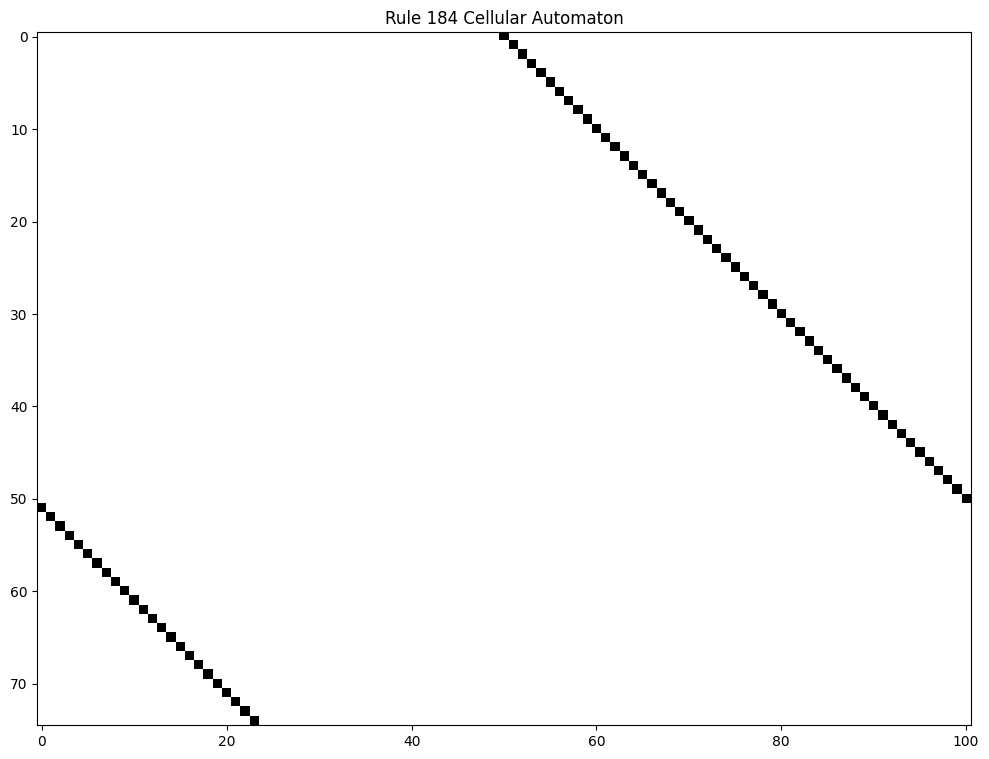

In [15]:
# Run Rule 30 cellular automaton
rule_number = 184
ca_grid = cellular_automaton(rule_number, size=101, steps=75)

# Plot the result
plt.figure(figsize=(10, 10))
plt.imshow(ca_grid, cmap='binary', interpolation='none')
plt.title(f'Rule {rule_number} Cellular Automaton')
plt.tight_layout()
plt.show()

Rule 30 is a perfect example of a complex system. Despite having extremely simple rules, it generates patterns that appear random and cannot be predicted without running the full simulation. This demonstrates emergence - complex, unpredictable behavior arising from simple rules.

## Quantifying Complexity vs. Complicatedness

One way to distinguish complex from complicated systems is through information theory metrics:

In [10]:
def entropy(signal):
    """Calculate Shannon entropy of a signal."""
    values, counts = np.unique(signal, return_counts=True)
    probabilities = counts / len(signal)
    return -np.sum(probabilities * np.log2(probabilities))

# Sample entropy for pendulum (predictable, complicated)
# Convert continuous values to discrete bins
pendulum_bins = np.digitize(theta, bins=np.linspace(-np.pi/4, np.pi/4, 20))
pendulum_entropy = entropy(pendulum_bins)

# Sample entropy for cellular automaton (complex)
ca_entropy = entropy(ca_grid[-1, :])

print(f"Pendulum entropy: {pendulum_entropy:.4f} bits")
print(f"Cellular automaton entropy: {ca_entropy:.4f} bits")

Pendulum entropy: 3.5558 bits
Cellular automaton entropy: 0.9914 bits


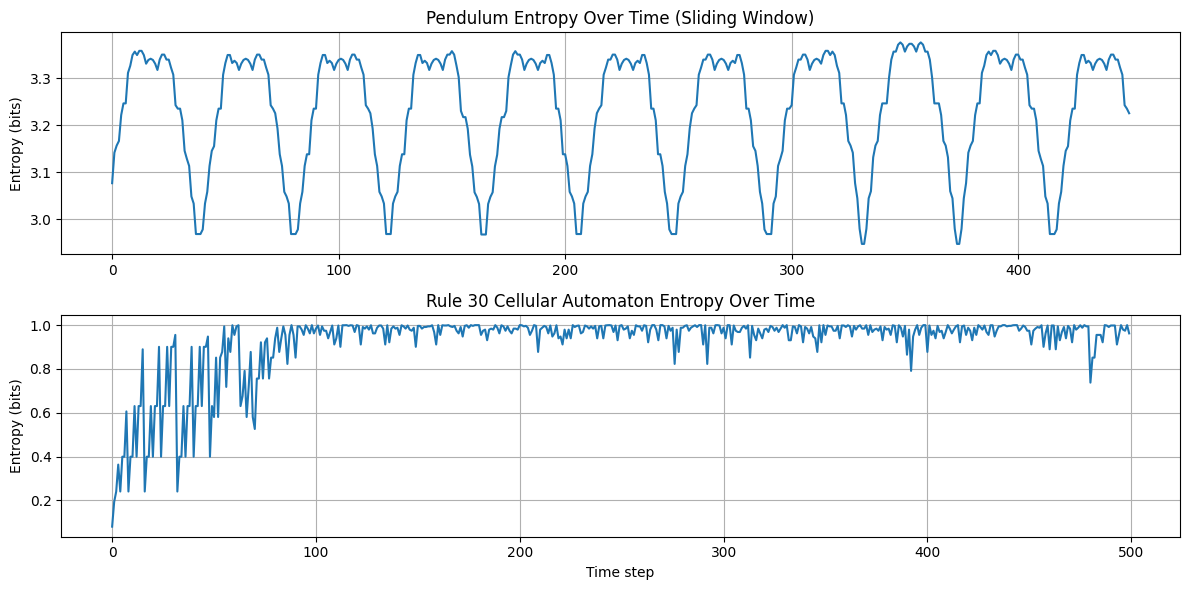

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# --- Entropy Function ---
def entropy(signal):
    values, counts = np.unique(signal, return_counts=True)
    probabilities = counts / len(signal)
    return -np.sum(probabilities * np.log2(probabilities + 1e-12))  # avoid log(0)

# --- Simulate Pendulum (Simple Harmonic Approximation) ---
def simulate_pendulum(timesteps, dt=0.05):
    omega = 1.5  # angular frequency
    t = np.arange(0, timesteps * dt, dt)
    theta = (np.pi / 6) * np.sin(omega * t)  # amplitude: 30 degrees
    return theta

def get_rule_array(rule_number):
    """Convert rule number (0–255) to binary array of length 8."""
    return [int(bit) for bit in f"{rule_number:08b}"][::-1]

# --- Sliding window entropy over theta ---
def pendulum_entropy_over_time(theta, bins=20, window_size=50):
    entropies = []
    bin_edges = np.linspace(-np.pi/4, np.pi/4, bins)
    for i in range(len(theta) - window_size):
        window = theta[i:i+window_size]
        binned = np.digitize(window, bins=bin_edges)
        entropies.append(entropy(binned))
    return entropies

# --- Simulate Rule 30 Cellular Automaton ---
def simulate_rule(rule_number=101, size=101, steps=100):
    rule = get_rule_array(rule_number)
    grid = np.zeros((steps, size), dtype=int)
    grid[0, size // 2] = 1  # seed in the middle

    for t in range(1, steps):
        for i in range(1, size - 1):
            pattern = grid[t-1, i-1:i+2]
            idx = pattern[0]*4 + pattern[1]*2 + pattern[2]
            grid[t, i] = rule[idx]
    return grid

def ca_entropy_over_time(grid):
    return [entropy(row) for row in grid]

# --- Run Simulations ---
timesteps = 500
theta = simulate_pendulum(timesteps)
pendulum_ent = pendulum_entropy_over_time(theta)

ca_grid = simulate_rule_30(size=101, steps=timesteps)
ca_ent = ca_entropy_over_time(ca_grid)

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(pendulum_ent)
plt.title("Pendulum Entropy Over Time (Sliding Window)")
plt.ylabel("Entropy (bits)")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(ca_ent)
plt.title("Rule 30 Cellular Automaton Entropy Over Time")
plt.xlabel("Time step")
plt.ylabel("Entropy (bits)")
plt.grid(True)

plt.tight_layout()
plt.show()


The higher entropy in the cellular automaton reflects its more complex, less predictable behavior compared to the pendulum.

## Exercise: Analyzing a Simple Traffic Model

### Solved Example: Nagel-Schreckenberg Traffic Model

Let's implement a simplified traffic model to explore whether traffic flows exhibit complex or merely complicated behavior.

In [16]:
def nagel_schreckenberg(length=100, steps=100, density=0.3, max_speed=5, p_slow=0.3):
    """Implement the Nagel-Schreckenberg traffic model.
    
    Parameters:
    - length: Length of the road
    - steps: Number of simulation steps
    - density: Car density (0-1)
    - max_speed: Maximum car speed
    - p_slow: Probability of random slowing
    
    Returns:
    - road_history: History of road states
    - speeds: Average speeds at each time step
    - flow: Traffic flow at each time step
    """
    
    # Initialize road
    n_cars = int(length * density)
    road = np.zeros(length, dtype=int)  # -1 means empty, otherwise it's car speed
    
    # Randomly place cars
    car_positions = np.random.choice(length, n_cars, replace=False)
    for pos in car_positions:
        road[pos] = np.random.randint(0, max_speed + 1)  # Random initial speed
    
    # History arrays
    road_history = np.zeros((steps, length), dtype=int)
    speeds = np.zeros(steps)
    flow = np.zeros(steps)
    
    for t in range(steps):
        # Record current state
        road_history[t] = (road > 0).astype(int)  # Just record presence of cars
        
        # Calculate average speed and flow
        car_speeds = road[road > 0]
        if len(car_speeds) > 0:
            speeds[t] = np.mean(car_speeds)
            flow[t] = density * speeds[t]
        
        # Create new road for next step
        new_road = np.zeros(length, dtype=int)
        
        for i in range(length):
            if road[i] > 0:  # If there's a car
                speed = road[i]
                
                # Step 1: Acceleration
                if speed < max_speed:
                    speed += 1
                
                # Step 2: Slowing due to cars ahead
                distance = 1
                while True:
                    next_pos = (i + distance) % length
                    if road[next_pos] > 0:  # Car found ahead
                        break
                    distance += 1
                    if distance > speed:
                        break
                
                speed = min(speed, distance - 1)
                
                # Step 3: Randomization
                if speed > 0 and np.random.random() < p_slow:
                    speed -= 1
                
                # Step 4: Car movement
                new_pos = (i + speed) % length
                new_road[new_pos] = speed
        
        road = new_road
        
    return road_history, speeds, flow

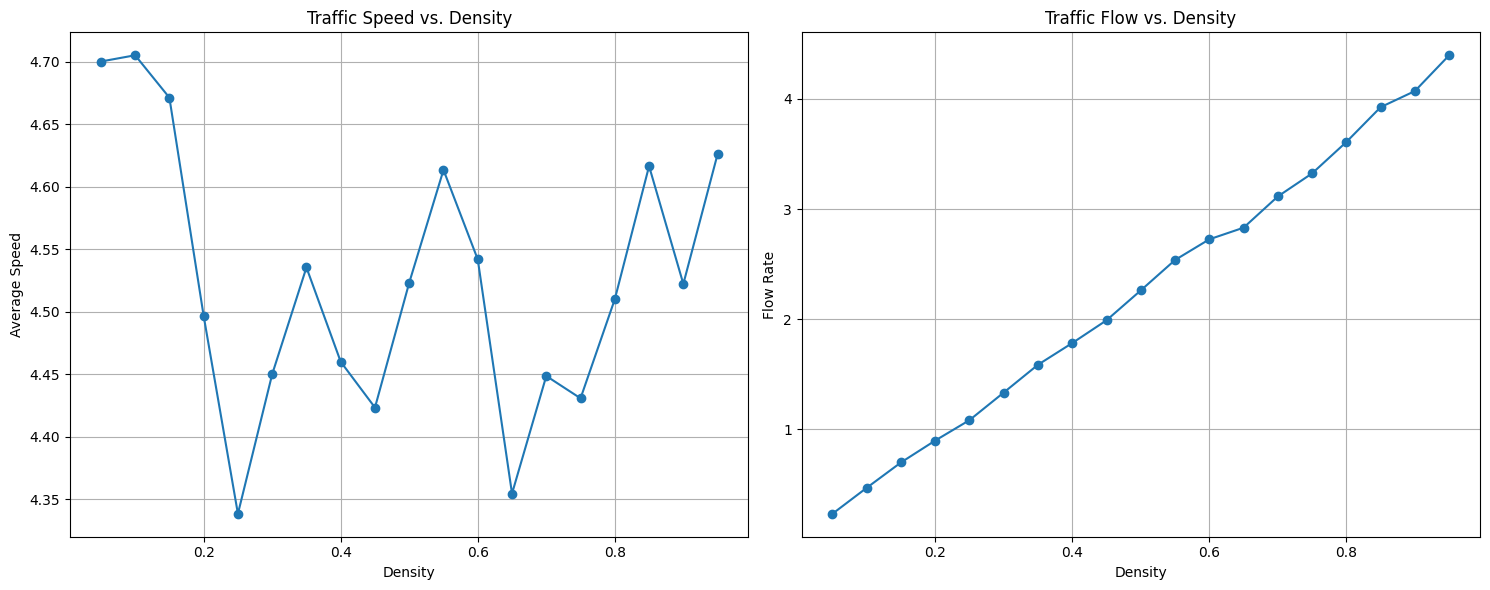

In [20]:
# Run simulation with different densities
densities = np.linspace(0.05, 0.95, 19)  # Density values from 5% to 95%
avg_speeds = []
avg_flows = []

for density in densities:
    history, speeds, flow = nagel_schreckenberg(density=density, steps=100)
    # Use the last 50 steps to calculate averages (after transient)
    avg_speeds.append(np.mean(speeds[50:]))
    avg_flows.append(np.mean(flow[50:]))

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(densities, avg_speeds, 'o-')
ax1.set_xlabel('Density')
ax1.set_ylabel('Average Speed')
ax1.set_title('Traffic Speed vs. Density')
ax1.grid(True)

ax2.plot(densities, avg_flows, 'o-')
ax2.set_xlabel('Density')
ax2.set_ylabel('Flow Rate')
ax2.set_title('Traffic Flow vs. Density')
ax2.grid(True)

plt.tight_layout()
plt.show()

#### Analysis of the Traffic Model

The traffic model demonstrates characteristics of a complex (not just complicated) system:

1. **Emergent behavior**: Traffic jams form spontaneously even without accidents
2. **Phase transitions**: Notice how flow peaks at medium density, then collapses - this is similar to a phase transition
3. **Nonlinearity**: The relationship between density and flow is not linear
4. **Sensitivity to initial conditions**: Small variations in initial car placements can lead to very different traffic patterns

This is why traffic is considered a complex system - despite having relatively simple rules for individual cars, the collective behavior shows emergent properties that can't be easily predicted from those rules.

## Your Turn: Economic Market Model

Implement a simple economic market model and analyze whether it exhibits complex or merely complicated behavior. Here's a starting point for a supply and demand model - complete it and analyze the results.

In [42]:
import numpy as np

def market_model(n_agents=100, n_steps=100, initial_price=50,
                 learning_rate=0.1, price_noise_std=0.5):
    """Simple adaptive market model with external price noise and tracked price change."""
    
    prices = np.zeros(n_steps)
    supply = np.zeros(n_steps)
    demand = np.zeros(n_steps)
    price_change_history = np.zeros(n_steps)
    prices[0] = initial_price

    n_sellers = n_agents // 2
    n_buyers = n_agents - n_sellers

    # Supply: a_i * p + b_i
    a_s = np.random.uniform(0.5, 1.5, n_sellers)
    b_s = np.random.uniform(-10, 10, n_sellers)

    # Demand: c_i / p + d_i
    c_b = np.random.uniform(10, 50, n_buyers)
    d_b = np.random.uniform(-5, 5, n_buyers)

    for t in range(1, n_steps):
        p = prices[t-1]

        # Supply
        seller_supply = a_s * p + b_s
        seller_supply = np.clip(seller_supply, 0, None)
        total_supply = np.sum(seller_supply)

        # Demand
        buyer_demand = c_b / p + d_b
        buyer_demand = np.clip(buyer_demand, 0, None)
        total_demand = np.sum(buyer_demand)

        supply[t] = total_supply
        demand[t] = total_demand

        # Price dynamics
        price_change = learning_rate * (total_demand - total_supply)
        noise = np.random.normal(0, price_noise_std)
        delta_price = price_change + noise
        price_change_history[t] = delta_price
        prices[t] = max(prices[t-1] + delta_price, 0.01)

        # Agent adaptation
        profit_signal = total_demand - total_supply
        b_s += learning_rate * profit_signal * np.random.uniform(-1, 1, n_sellers)
        d_b += learning_rate * (total_supply - total_demand) * np.random.uniform(-1, 1, n_buyers)

    return prices, supply, demand, price_change_history


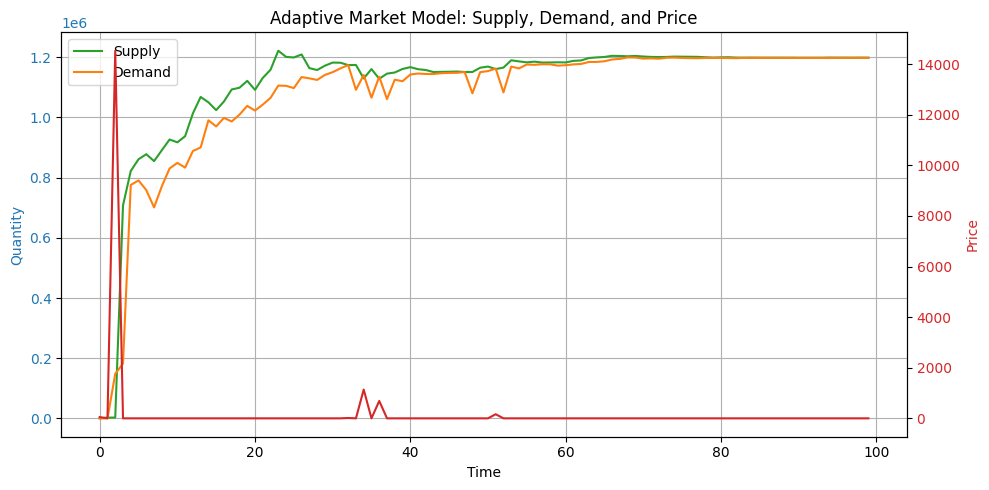

In [48]:
import matplotlib.pyplot as plt

prices, supply, demand, price_change_history = market_model()

fig, ax1 = plt.subplots(figsize=(10, 5))

# Left Y-axis: supply and demand
ax1.set_xlabel("Time")
ax1.set_ylabel("Quantity", color='tab:blue')
ax1.plot(supply, label="Supply", color='tab:green')
ax1.plot(demand, label="Demand", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc="upper left")
ax1.grid(True)

# Right Y-axis: price
ax2 = ax1.twinx()
ax2.set_ylabel("Price", color='tab:red')
ax2.plot(prices, label="Price", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("Adaptive Market Model: Supply, Demand, and Price")
fig.tight_layout()
plt.show()

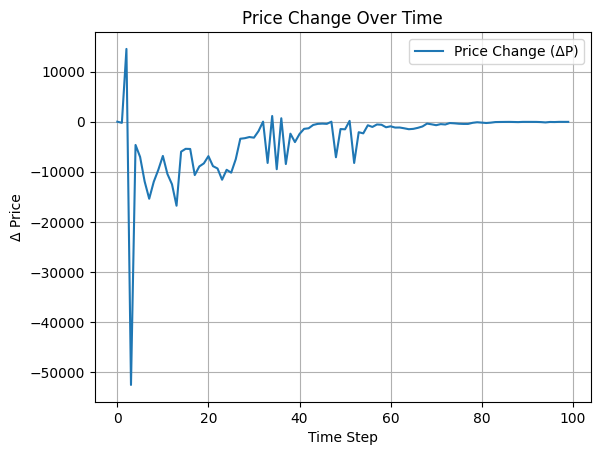

In [49]:
import matplotlib.pyplot as plt

plt.plot(price_change_history, label="Price Change (ΔP)")
plt.title("Price Change Over Time")
plt.xlabel("Time Step")
plt.ylabel("Δ Price")
plt.grid(True)
plt.legend()
plt.show()


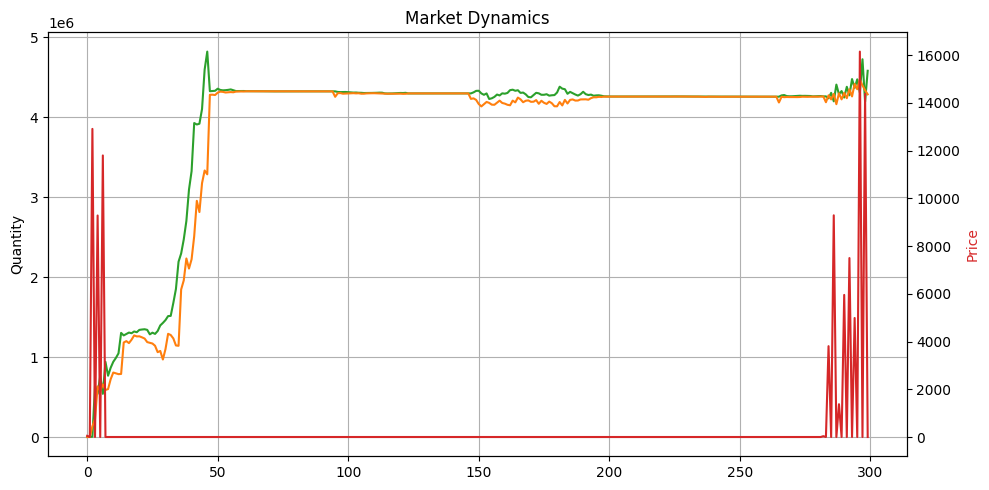

Q1: Do you observe patterns, fluctuations, or coordination emerging from simple agent rules?
Would you classify this as emergent behavior?


In [52]:
# Run the market model with default parameters
prices, supply, demand, price_change_history = market_model(price_noise_std=2.0, n_steps=300)

# Plot price, supply, and demand
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(supply, label="Supply", color='tab:green')
ax1.plot(demand, label="Demand", color='tab:orange')
ax1.set_ylabel("Quantity")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(prices, label="Price", color='tab:red')
ax2.set_ylabel("Price", color='tab:red')

plt.title("Market Dynamics")
plt.xlabel("Time")
fig.tight_layout()
plt.show()

# Prompt
print("Q1: Do you observe patterns, fluctuations, or coordination emerging from simple agent rules?")
print("Would you classify this as emergent behavior?")


In [53]:
# Pendulum model (reused)
def simulate_pendulum(timesteps, dt=0.05):
    omega = 1.5
    t = np.arange(0, timesteps * dt, dt)
    theta = (np.pi / 6) * np.sin(omega * t)
    return theta

def entropy(signal):
    values, counts = np.unique(signal, return_counts=True)
    probabilities = counts / len(signal)
    return -np.sum(probabilities * np.log2(probabilities + 1e-12))

# Compare entropy
theta = simulate_pendulum(300)
pendulum_entropy = entropy(np.digitize(theta, bins=np.linspace(-np.pi/4, np.pi/4, 20)))
market_entropy = entropy(np.digitize(prices, bins=np.linspace(min(prices), max(prices), 20)))

print(f"Pendulum entropy: {pendulum_entropy:.4f} bits")
print(f"Market price entropy: {market_entropy:.4f} bits")

print("Q3: Does entropy reflect perceived complexity?")
print("Is higher entropy always a sign of higher complexity?")


Pendulum entropy: 3.5485 bits
Market price entropy: 0.3470 bits
Q3: Does entropy reflect perceived complexity?
Is higher entropy always a sign of higher complexity?


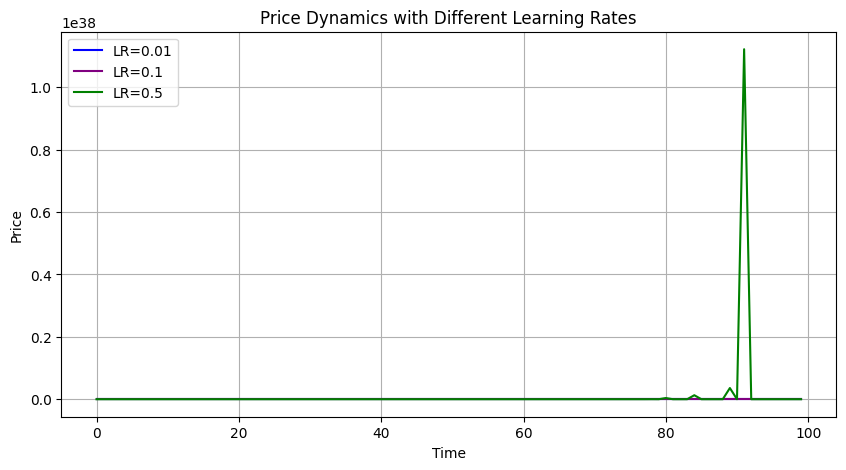

Q4: How do learning rates affect market dynamics?
Which settings lead to convergence, cycles, or chaos?


In [59]:
# Try different learning rates
learning_rates = [0.01, 0.1, 0.5]
colors = ['blue', 'purple', 'green']

plt.figure(figsize=(10, 5))
for lr, c in zip(learning_rates, colors):
    prices, *_ = market_model(learning_rate=lr, price_noise_std=1.0)
    plt.plot(prices, label=f"LR={lr}", color=c)

plt.title("Price Dynamics with Different Learning Rates")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

print("Q4: How do learning rates affect market dynamics?")
print("Which settings lead to convergence, cycles, or chaos?")


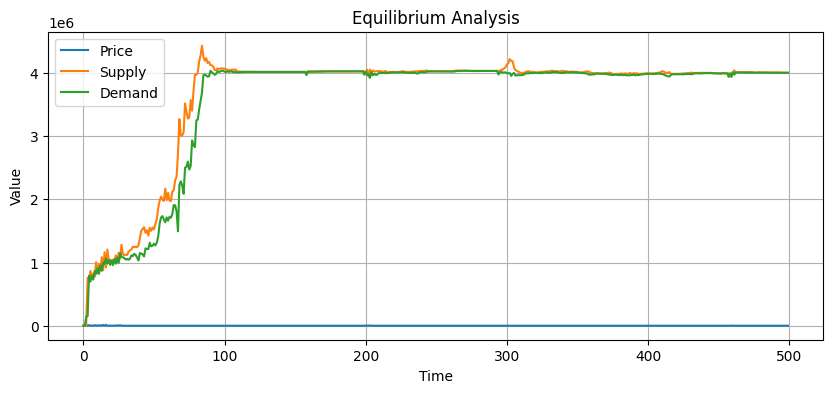

Q5: Does the market reach a stable point where price ≈ equilibrium?
Try changing number of agents, noise level, or learning rate to explore different regimes.


In [68]:
# Run again
prices, supply, demand, _ = market_model(n_steps=500, price_noise_std=0.1)

plt.figure(figsize=(10, 4))
plt.plot(prices, label="Price")
plt.plot(supply, label="Supply")
plt.plot(demand, label="Demand")
plt.title("Equilibrium Analysis")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

print("Q5: Does the market reach a stable point where price ≈ equilibrium?")
print("Try changing number of agents, noise level, or learning rate to explore different regimes.")


### Questions to Consider

1. Does your market model display emergent behavior that would classify it as complex rather than merely complicated?
2. What properties of complex systems does your model exhibit (if any)?
3. How would you quantify the complexity of your market model compared to, for example, the pendulum model?
4. How do changes in agent behavior parameters affect the overall system?
5. Does the market reach equilibrium? If so, under what conditions? If not, why not?

## Key Takeaways

- **Complicated Systems**: Have many components with fixed interactions; behavior is predictable though potentially intricate (e.g., a mechanical watch)
- **Complex Systems**: Have components that adapt and interact, leading to emergent behavior that cannot be predicted from components alone (e.g., economies, ecosystems)
- **Analysis Approaches**: Different types of systems require different analytical approaches - reductionist for complicated systems, holistic for complex systems
- **Computational Models**: Computer simulations are essential tools for studying complex systems where mathematical tractability is limited